# Cricket Analytics Masterclass: IPL Edition(2023)

Explore the exciting world of Indian Premier League (IPL) through this data analysis project! Discover which teams shine the brightest, who the star players are, and the strategies behind winning tosses. Dive into venue-specific strengths, learn about nail-biting margins of victory, and understand the role of umpires in this cricket extravaganza. It's a fascinating journey through IPL's rich history from 2008 to 2022!

## About the Author

**HASHMI MOHSIN BHATT**

**B.TECH CSE_AI**

- GitHub: https://github.com/HASHMI2503/IPL-Performance-Analysis (Same Project)

Feel free to connect and reach out! feedback are welcome.


In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2022.csv
/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv


In [73]:
ipl = pd.read_csv('/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv')

### Data Check-in: 7 Quick Questions

1. **Size of the Squad?**
   - How many players (rows) and stats (columns) are we dealing with?

2. **First Impressions?**
   - Sneak peek at the starting lineup (first few rows).

3. **What's in the Mix?**
   - Quick rundown on the types of data we've got.

4. **Any Missing Players?**
   - Spotted any gaps in the team? Check for missing values.

5. **Math in Action?**
   - What do the numbers tell us? Quick stats on the players' performance.

6. **Seeing Double?**
   - Any players pulling double duty? Look out for duplicated entries.

7. **Team Chemistry?**
   - Do certain stats play well together? Check the correlation.

Just 7 chill questions to vibe with our dataset! 🚀


In [74]:
ipl.shape

(950, 20)

(950, 20)

In [75]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [76]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [77]:
ipl.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [78]:
ipl.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [79]:
ipl.duplicated().sum()

0

In [80]:
# ipl.corr()
# The dataset contains numerous categorical variables,
# making it challenging to pinpoint correlations between data columns.

### Key Observations & Next Steps:

**Data Size:**
- Medium-sized dataset with 950 rows and 19 columns.

**Data Types:**
- Opportunity to convert categorical columns ('TossDecision,' 'Margin,' 'SuperOver') to integers for clarity.

**Null Values:**
- Presence of null values in some columns.
- **Handling Null Values:**
  - → Focus on filling null values, especially in critical columns.
  - → Explore strategies for imputing missing values.

**Dropping Column:**
- → Consider dropping 'Method' due to high null count.
- → Assess the impact on overall data quality.

**Duplicates:**
- No duplicated values found in the dataset.
- → Keep an eye out for potential duplicated entries.


### Convert Columns to Integers:

- 'TossDecision'
- 'Margin'
- 'SuperOver'


In [81]:
# Convert 'TossDecision' column to integers (map 'bat' to 1 and 'field' to 0)
ipl['TossDecision'] = ipl['TossDecision'].map({'bat': 1, 'field': 0}).astype(int)

In [82]:
# Convert 'SuperOver' column to integers (map 'N' to 0 and 'Y' to 1), fill null values with 0
ipl['SuperOver'] = ipl['SuperOver'].map({'N': 0, 'Y': 1}).fillna(0).astype(int)

In [83]:
# Convert 'Margin' column to integers, fill null values with 0
ipl['Margin'] = ipl['Margin'].fillna(0).astype(int)

In [84]:
ipl.sample(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
311,1136562,Chandigarh,2018-04-08,2018,2,Delhi Daredevils,Kings XI Punjab,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,0,0,Kings XI Punjab,Wickets,6,NaN,KL Rahul,"['C Munro', 'G Gambhir', 'SS Iyer', 'V Shankar...","['KL Rahul', 'MA Agarwal', 'Yuvraj Singh', 'KK...",KN Ananthapadmanabhan,RJ Tucker
937,335994,Mumbai,2008-04-27,2007/08,14,Mumbai Indians,Deccan Chargers,Dr DY Patil Sports Academy,Deccan Chargers,0,0,Deccan Chargers,Wickets,10,NaN,AC Gilchrist,"['L Ronchi', 'ST Jayasuriya', 'AM Rahane', 'RV...","['AC Gilchrist', 'VVS Laxman', 'A Symonds', 'R...",Asad Rauf,SL Shastri
794,419146,Chandigarh,2010-04-09,2009/10,41,Kings XI Punjab,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,1,0,Kings XI Punjab,Wickets,6,NaN,KC Sangakkara,"['AB Barath', 'DPMD Jayawardene', 'KC Sangakka...","['S Dhawan', 'SR Tendulkar', 'AT Rayudu', 'SS ...",M Erasmus,AM Saheba
68,1304052,Mumbai,2022-03-30,2022,6,Kolkata Knight Riders,Royal Challengers Bangalore,"Dr DY Patil Sports Academy, Mumbai",Royal Challengers Bangalore,0,0,Royal Challengers Bangalore,Wickets,3,NaN,PWH de Silva,"['AM Rahane', 'VR Iyer', 'SS Iyer', 'N Rana', ...","['F du Plessis', 'Anuj Rawat', 'V Kohli', 'DJ ...",J Madanagopal,Navdeep Singh
835,392239,Johannesburg,2009-05-24,2009,Final,Royal Challengers Bangalore,Deccan Chargers,New Wanderers Stadium,Royal Challengers Bangalore,0,0,Deccan Chargers,Runs,6,NaN,A Kumble,"['JH Kallis', 'MK Pandey', 'RE van der Merwe',...","['AC Gilchrist', 'HH Gibbs', 'TL Suman', 'A Sy...",RE Koertzen,SJA Taufel
222,1178407,Chandigarh,2019-04-16,2019,32,Kings XI Punjab,Rajasthan Royals,Punjab Cricket Association IS Bindra Stadium,Rajasthan Royals,0,0,Kings XI Punjab,Runs,12,NaN,R Ashwin,"['KL Rahul', 'CH Gayle', 'MA Agarwal', 'DA Mil...","['RA Tripathi', 'JC Buttler', 'SV Samson', 'AM...",AK Chaudhary,VA Kulkarni
680,548328,Chandigarh,2012-04-18,2012,22,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,1,0,Kolkata Knight Riders,Wickets,8,NaN,G Gambhir,"['AC Gilchrist', 'PC Valthaty', 'SE Marsh', 'M...","['BB McCullum', 'G Gambhir', 'MS Bisla', 'JH K...",JD Cloete,RJ Tucker
931,336000,Jaipur,2008-05-01,2007/08,18,Rajasthan Royals,Kolkata Knight Riders,Sawai Mansingh Stadium,Rajasthan Royals,1,0,Rajasthan Royals,Runs,45,NaN,SA Asnodkar,"['GC Smith', 'SA Asnodkar', 'M Kaif', 'YK Path...","['Salman Butt', 'SC Ganguly', 'AB Agarkar', 'B...",RE Koertzen,GA Pratapkumar
854,392220,Kimberley,2009-05-11,2009,40,Deccan Chargers,Rajasthan Royals,De Beers Diamond Oval,Deccan Chargers,1,0,Deccan Chargers,Runs,53,NaN,DR Smith,"['TL Suman', 'AC Gilchrist', 'RG Sharma', 'A S...","['GC Smith', 'SA Asnodkar', 'LA Carseldine', '...",GAV Baxter,HDPK Dharmasena
887,392185,Port Elizabeth,2009-04-20,2009,5,Royal Challengers Bangalore,Chennai Super Kings,St George's Park,Chennai Super Kings,1,0,Chennai Super Kings,Runs,92,NaN,M Muralitharan,"['P Kumar', 'RV Uthappa', 'JH Kallis', 'LRPL T...","['PA Patel', 'ML Hayden', 'SK Raina', 'MS Dhon...",BG Jerling,SJA Taufel


In [85]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               950 non-null    int64 
 1   City             899 non-null    object
 2   Date             950 non-null    object
 3   Season           950 non-null    object
 4   MatchNumber      950 non-null    object
 5   Team1            950 non-null    object
 6   Team2            950 non-null    object
 7   Venue            950 non-null    object
 8   TossWinner       950 non-null    object
 9   TossDecision     950 non-null    int64 
 10  SuperOver        950 non-null    int64 
 11  WinningTeam      946 non-null    object
 12  WonBy            950 non-null    object
 13  Margin           950 non-null    int64 
 14  method           19 non-null     object
 15  Player_of_Match  946 non-null    object
 16  Team1Players     950 non-null    object
 17  Team2Players     950 non-null    ob

### Fill Nulls in 'City' Column:

Null values in the 'City' column are filled with 'Dubai' for consistency and representation clarity.


In [86]:
# Fill null values in 'City' column with 'Dubai'
ipl['City'].fillna('Dubai', inplace=True)

/tmp/ipykernel_1489/2634188875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl['City'].fillna('Dubai', inplace=True)


In [87]:
ipl[ipl['City'] == 'Dubai']

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
74,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,0,0,Chennai Super Kings,Runs,27,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
77,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,0,0,Chennai Super Kings,Wickets,4,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
78,1254101,Dubai,2021-10-08,2021,56,Delhi Capitals,Royal Challengers Bangalore,Dubai International Cricket Stadium,Royal Challengers Bangalore,0,0,Royal Challengers Bangalore,Wickets,7,NaN,KS Bharat,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SS Iyer', ...","['V Kohli', 'D Padikkal', 'KS Bharat', 'AB de ...",KN Ananthapadmanabhan,Nitin Menon
81,1254094,Dubai,2021-10-07,2021,53,Chennai Super Kings,Punjab Kings,Dubai International Cricket Stadium,Punjab Kings,0,0,Punjab Kings,Wickets,6,NaN,KL Rahul,"['RD Gaikwad', 'F du Plessis', 'MM Ali', 'RV U...","['KL Rahul', 'MA Agarwal', 'SN Khan', 'M Shahr...",K Srinivasan,RK Illingworth
84,1254110,Dubai,2021-10-04,2021,50,Chennai Super Kings,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,0,0,Delhi Capitals,Wickets,3,NaN,AR Patel,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AK Chaudhary,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,729295,Dubai,2014-04-22,2014,9,Kings XI Punjab,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,0,0,Kings XI Punjab,Runs,72,NaN,GJ Maxwell,"['CA Pujara', 'V Sehwag', 'GJ Maxwell', 'DA Mi...","['AJ Finch', 'S Dhawan', 'DA Warner', 'KL Rahu...",M Erasmus,S Ravi
545,729291,Dubai,2014-04-20,2014,7,Rajasthan Royals,Kings XI Punjab,Sharjah Cricket Stadium,Kings XI Punjab,0,0,Kings XI Punjab,Wickets,7,NaN,GJ Maxwell,"['AM Nayar', 'AM Rahane', 'SV Samson', 'SR Wat...","['CA Pujara', 'V Sehwag', 'WP Saha', 'GJ Maxwe...",BF Bowden,M Erasmus
546,729289,Dubai,2014-04-19,2014,6,Kolkata Knight Riders,Delhi Daredevils,Dubai International Cricket Stadium,Kolkata Knight Riders,1,0,Delhi Daredevils,Wickets,4,NaN,JP Duminy,"['JH Kallis', 'G Gambhir', 'MK Pandey', 'RV Ut...","['M Vijay', 'MA Agarwal', 'KD Karthik', 'LRPL ...",Aleem Dar,VA Kulkarni
547,729287,Dubai,2014-04-19,2014,5,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Royal Challengers Bangalore,0,0,Royal Challengers Bangalore,Wickets,7,NaN,PA Patel,"['NJ Maddinson', 'PA Patel', 'V Kohli', 'Yuvra...","['MEK Hussey', 'AP Tare', 'AT Rayudu', 'RG Sha...",Aleem Dar,AK Chaudhary


In [88]:
# Fill null values in 'WinningTeam' column with 'None'
ipl['WinningTeam'].fillna('None', inplace=True)

/tmp/ipykernel_1489/732260102.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl['WinningTeam'].fillna('None', inplace=True)


In [89]:
# Drop the 'method' column
ipl.drop(columns=['method'], inplace=True)

In [90]:
# Fill null values in 'Player_of_Match' column with 'None'
ipl['Player_of_Match'].fillna('None', inplace=True)

/tmp/ipykernel_1489/3210106266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl['Player_of_Match'].fillna('None', inplace=True)


In [91]:
ipl.isnull().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

### Handling Null Values:

All null values in the dataset have been addressed:

- 'City' column: Filled with 'Dubai' for consistency.
- 'SuperOver' column: Filled with 0 for clarity (mapped 'N' to 0).
- 'Margin' column: Filled with 0.
- 'Season' column: No null values after conversion.
- 'Player_of_Match' column: Filled with 'None'.
- 'WinningTeam' column: Filled with 'None'.
- 'Method' column: Dropped to eliminate high null count.

### The dataset is now free of null values, enhancing its completeness and suitability for analysis.


### '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''


# Let the Analysis Begin and Visualization :



In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### 1. Team Performance Analysis:



In [93]:
# Unique team names
pd.unique(pd.concat([ipl['Team1'], ipl['Team2']]))

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [94]:
# Team-wise wins, total matches played, and losses
team_records = pd.DataFrame(index=pd.unique(pd.concat([ipl['Team1'], ipl['Team2']])))
team_records['Total Played'] = pd.concat([ipl['Team1'], ipl['Team2']]).value_counts().reset_index(name='Games Played').groupby('index').sum()['Games Played']
team_records['Wins'] = ipl['WinningTeam'].value_counts()
team_records['Losses'] = team_records['Total Played'] - team_records['Wins']
team_records


,Total Played,Wins,Losses
Rajasthan Royals,192,96,96
Royal Challengers Bangalore,226,109,117
Sunrisers Hyderabad,152,75,77
Delhi Capitals,63,36,27
Chennai Super Kings,208,121,87
Gujarat Titans,16,12,4
Lucknow Super Giants,15,9,6
Kolkata Knight Riders,223,114,109
Punjab Kings,28,13,15
Mumbai Indians,231,131,100


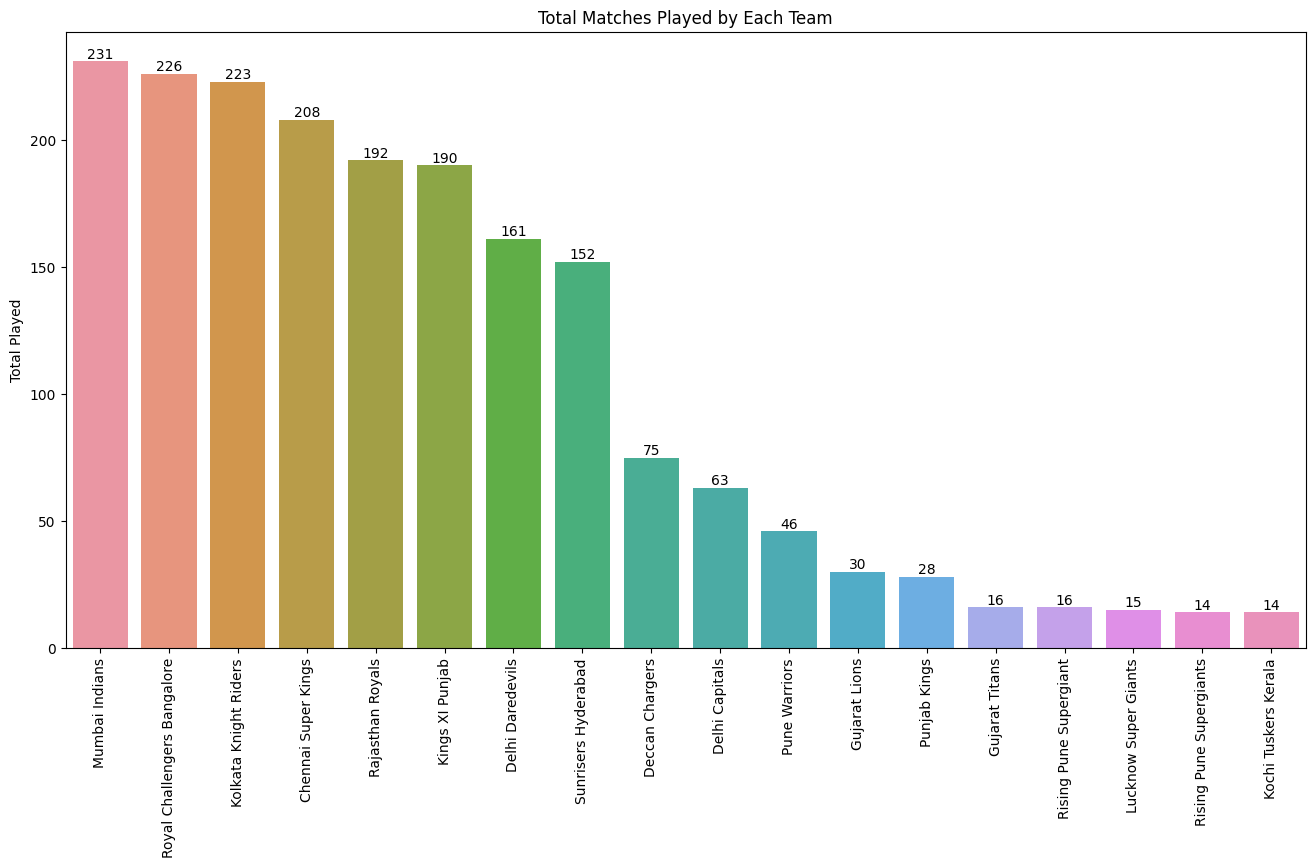

In [95]:
# Sorting the teams by total matches played
sorted_teams_by_matches_played = team_records.sort_values(by='Total Played', ascending=False)

# Bar plot for total matches played by each team with numbers
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x=sorted_teams_by_matches_played.index, y=sorted_teams_by_matches_played['Total Played'])
plt.xticks(rotation=90)
plt.title('Total Matches Played by Each Team')

# Add annotations with numbers
for index, value in enumerate(sorted_teams_by_matches_played['Total Played']):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()


<Figure size 1200x600 with 0 Axes>

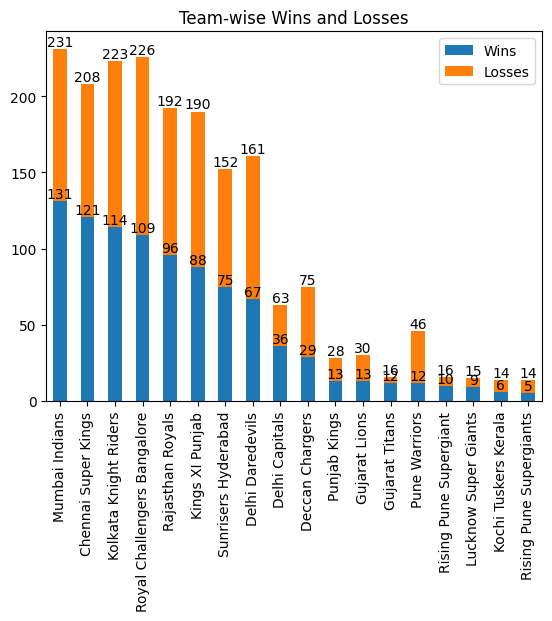

In [96]:
plt.figure(figsize=(12, 6))

# Stacked bar plot for wins and losses
stacked_bar_plot = team_records[['Wins', 'Losses']].sort_values(by='Wins', ascending=False).plot(kind='bar', stacked=True)

# Add annotations with numbers
for container in stacked_bar_plot.containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=90)
plt.title('Team-wise Wins and Losses')
plt.show()


In [97]:
# Total toss Wins
toss_wins = ipl['TossWinner'].value_counts().sort_values(ascending=False)
toss_wins

TossWinner
Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

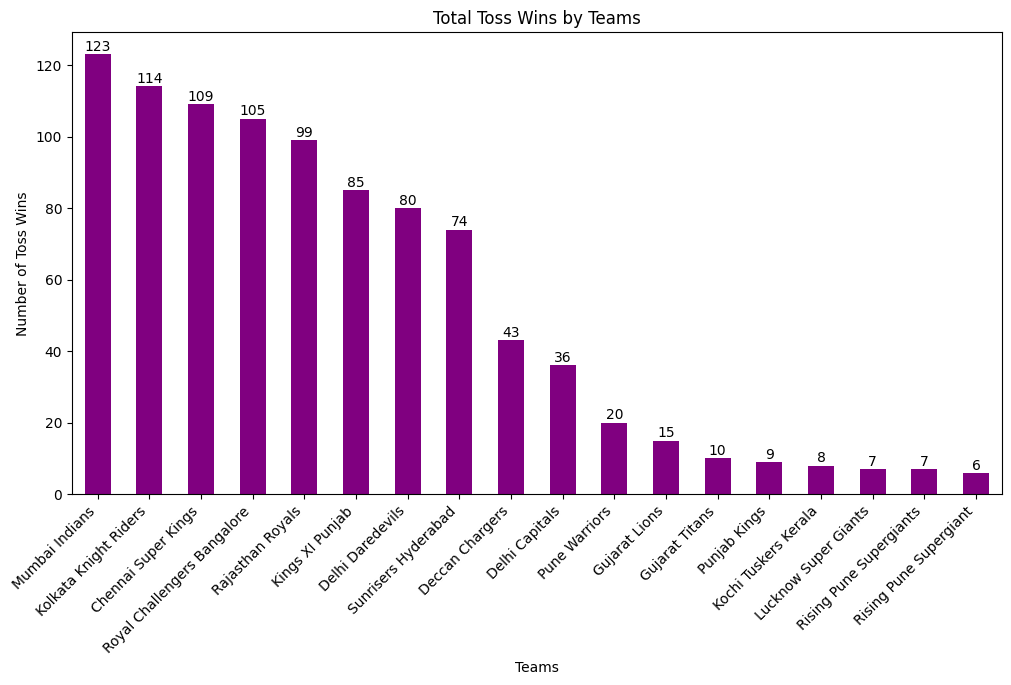

In [98]:
# Plotting
plt.figure(figsize=(12, 6))
toss_wins.plot(kind='bar', color='purple')

# Adding numbers on top of each bar
for index, value in enumerate(toss_wins):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
    
plt.title('Total Toss Wins by Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Toss Wins')
plt.xticks(rotation=45, ha='right')
plt.show()


In [99]:
# Winners of the finals for each season
ipl[ipl['MatchNumber'] == 'Final'][['Season', 'WinningTeam']].sort_values('Season').reset_index(drop=True)


,Season,WinningTeam
0,2007/08,Rajasthan Royals
1,2009,Deccan Chargers
2,2009/10,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [100]:
# Number of times each team won the final
final_wins = ipl[ipl['MatchNumber'] == "Final"]['WinningTeam'].value_counts()
final_wins

WinningTeam
Mumbai Indians           5
Chennai Super Kings      4
Kolkata Knight Riders    2
Gujarat Titans           1
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: count, dtype: int64

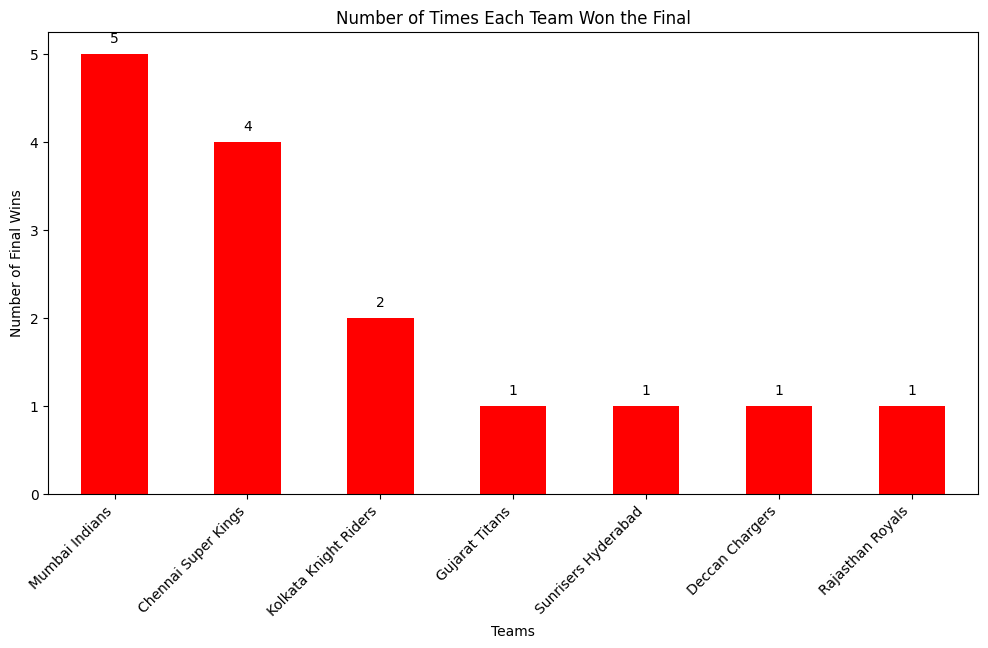

In [101]:
# Plotting
plt.figure(figsize=(12, 6))
bar_plot = final_wins.plot(kind='bar', color='red')

# Adding numbers on top of each bar
for index, value in enumerate(final_wins):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Number of Times Each Team Won the Final')
plt.xlabel('Teams')
plt.ylabel('Number of Final Wins')
plt.xticks(rotation=45, ha='right')
plt.show()


### Ee Sala Cup Namde 

### 2. Player Performance Analysis:

In [102]:
# Top 10 players with the most "Player of the Match" awards
top_players = ipl['Player_of_Match'].value_counts().head(10)
top_players

Player_of_Match
AB de Villiers    25
CH Gayle          22
RG Sharma         18
DA Warner         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
KA Pollard        14
V Kohli           14
Name: count, dtype: int64

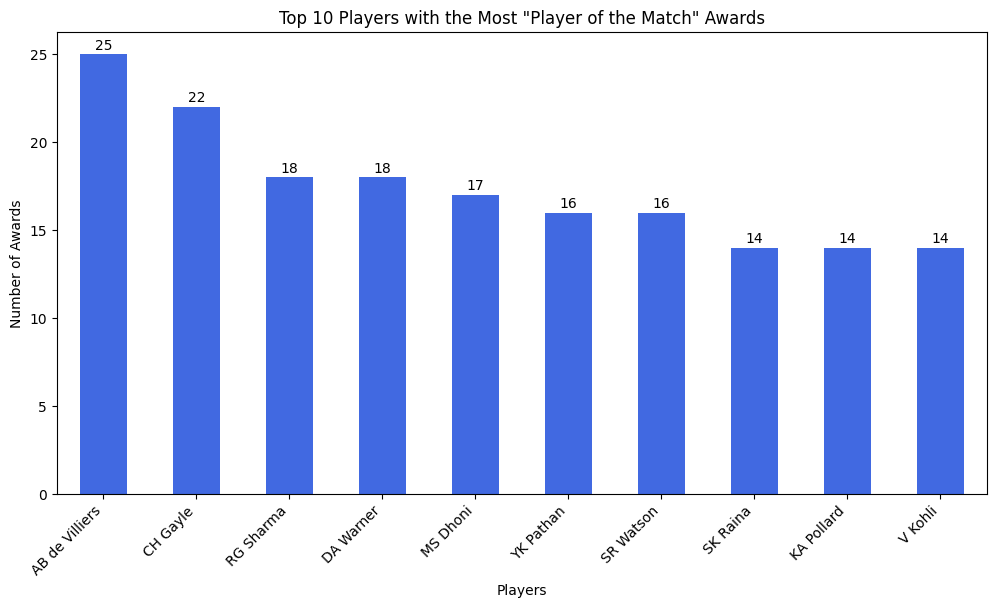

In [103]:
# Plotting
plt.figure(figsize=(12, 6))
bar_plot = top_players.plot(kind='bar', color='royalblue')

# Adding numbers on top of each bar
for index, value in enumerate(top_players):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Players with the Most "Player of the Match" Awards')
plt.xlabel('Players')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.show()


### 3. Venue Analysis:

In [104]:
# Display team-wise win count at each venue
team_venue_wins = ipl.groupby(['Venue', 'WinningTeam']).size().unstack().fillna(0)
team_venue_wins


WinningTeam,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,None,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Venue,,,,,,,,,,,,,,,,,,,
Arun Jaitley Stadium,1.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
"Arun Jaitley Stadium, Delhi",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Barabati Stadium,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brabourne Stadium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0
"Brabourne Stadium, Mumbai",0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0
Buffalo Park,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
De Beers Diamond Oval,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dr DY Patil Sports Academy,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
"Dr DY Patil Sports Academy, Mumbai",3.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,3.0


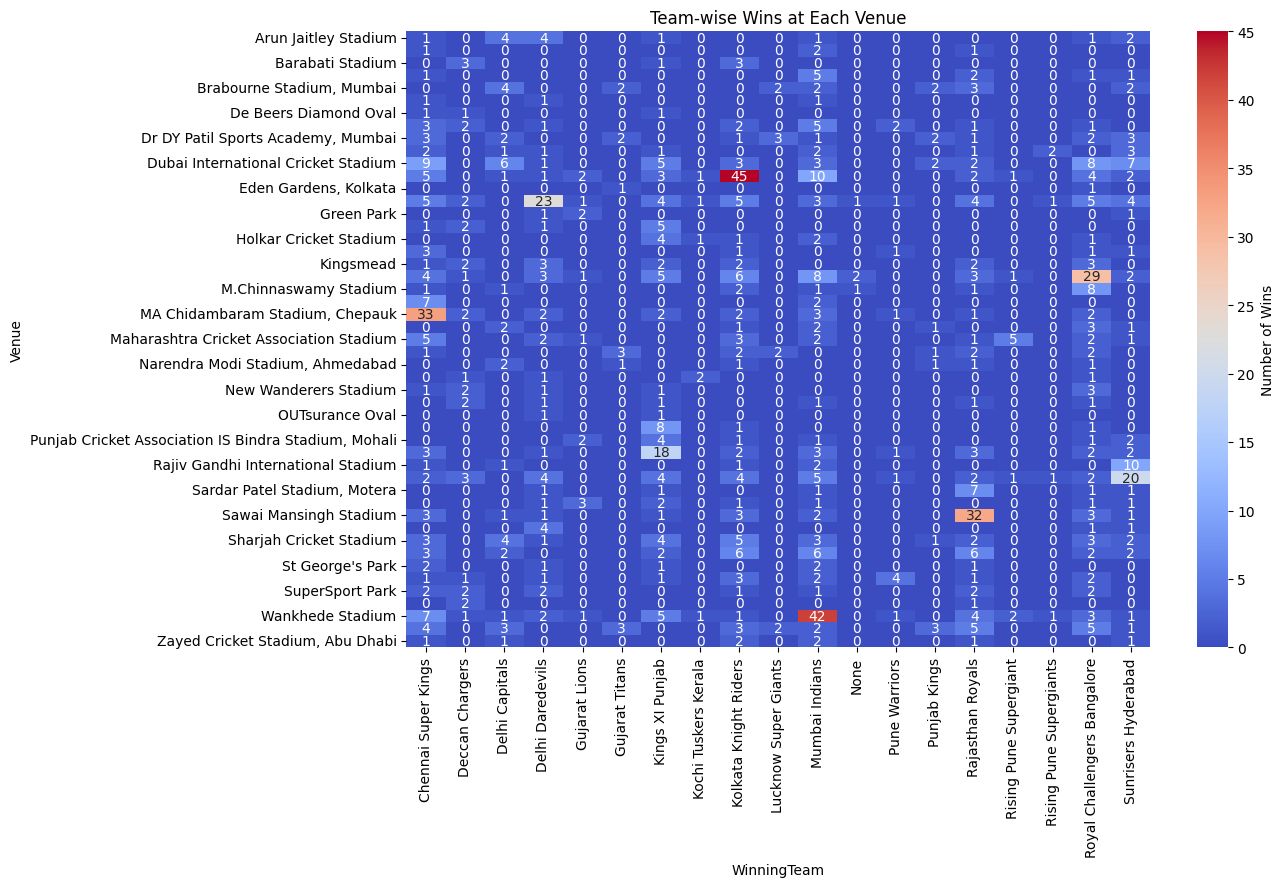

In [105]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(team_venue_wins, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Number of Wins'})
plt.title('Team-wise Wins at Each Venue')
plt.show()

### 4. Team Wins Analysis:

In [106]:
# Grouping data by season and team to get the count of wins
season_team_wins = ipl.groupby(['Season', 'WinningTeam']).size().unstack(fill_value=0)

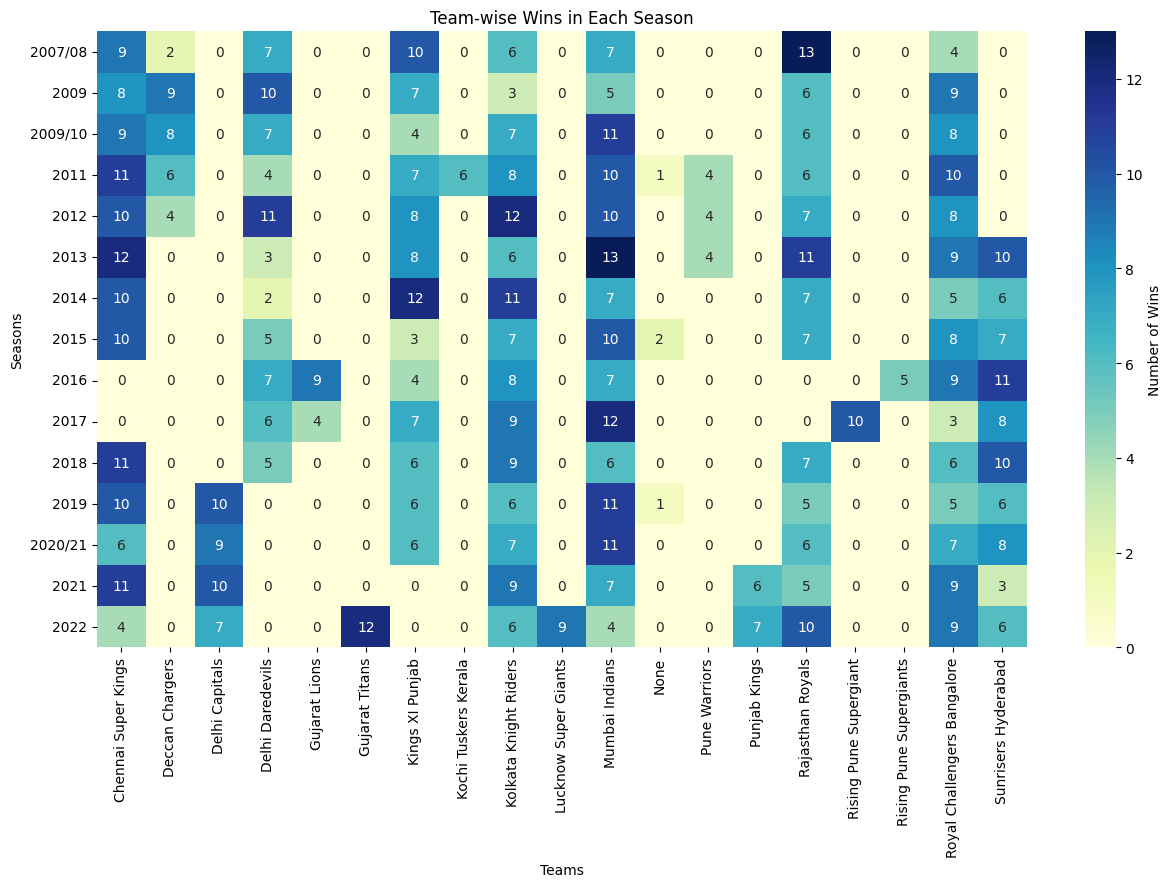

In [107]:
# Plotting
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(season_team_wins, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Wins'})
plt.title('Team-wise Wins in Each Season')
plt.xlabel('Teams')
plt.ylabel('Seasons')
plt.show()


In [108]:
# Team that won the most matches in each season
season_most_wins = ipl.groupby(['Season', 'WinningTeam']).size().groupby('Season').idxmax().reset_index(name='Most Wins')

# Team that won the final in each season
final_winners = ipl[ipl['MatchNumber'] == 'Final'][['Season', 'WinningTeam']].reset_index(drop=True)

# Merge the two DataFrames on 'Season'
season_wise_results = pd.merge(season_most_wins, final_winners, on='Season', how='left')

# Extract the team name from the 'Most Wins' column
season_wise_results['Most Wins'] = season_wise_results['Most Wins'].apply(lambda x: x[1])

season_wise_results


,Season,Most Wins,WinningTeam
0,2007/08,Rajasthan Royals,Rajasthan Royals
1,2009,Delhi Daredevils,Deccan Chargers
2,2009/10,Mumbai Indians,Chennai Super Kings
3,2011,Chennai Super Kings,Chennai Super Kings
4,2012,Kolkata Knight Riders,Kolkata Knight Riders
5,2013,Mumbai Indians,Mumbai Indians
6,2014,Kings XI Punjab,Kolkata Knight Riders
7,2015,Chennai Super Kings,Mumbai Indians
8,2016,Sunrisers Hyderabad,Sunrisers Hyderabad
9,2017,Mumbai Indians,Mumbai Indians


In [109]:
# Instances where the team with most wins and final winning team are the same
consistent_winners_df = season_wise_results[season_wise_results['Most Wins'] == season_wise_results['WinningTeam']]
consistent_winners_df


,Season,Most Wins,WinningTeam
0,2007/08,Rajasthan Royals,Rajasthan Royals
3,2011,Chennai Super Kings,Chennai Super Kings
4,2012,Kolkata Knight Riders,Kolkata Knight Riders
5,2013,Mumbai Indians,Mumbai Indians
8,2016,Sunrisers Hyderabad,Sunrisers Hyderabad
9,2017,Mumbai Indians,Mumbai Indians
10,2018,Chennai Super Kings,Chennai Super Kings
11,2019,Mumbai Indians,Mumbai Indians
12,2020/21,Mumbai Indians,Mumbai Indians
13,2021,Chennai Super Kings,Chennai Super Kings


In [110]:
# calculate the ratio of total seasons to consistent winners
total_seasons = season_wise_results.shape[0]
consistent_winners_count = consistent_winners_df.shape[0]
consistent_winners_ratio = consistent_winners_count / total_seasons * 100

total_seasons, consistent_winners_count, consistent_winners_ratio


(15, 11, 73.33333333333333)

In [ ]:
# Plotting
labels = ['Consistent Winners', 'Non-Consistent Winners']
sizes = [consistent_winners_count,total_seasons - consistent_winners_count]
colors = ['gold', 'lime']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Consistent Winners to Total Seasons')
plt.show()


### 5. Toss Impact:

In [ ]:
# team won the toss
toss_counts = ipl['TossWinner'].value_counts()

# toss-winning team is also the match-winning team
toss_and_match_winner = ipl[ipl['TossWinner'] == ipl['WinningTeam']]['TossWinner'].value_counts()

# Combine both into a DataFrame
toss_impact_analysis = pd.DataFrame({'Tosses_Won': toss_counts, 'Matches_Won_After_Winning_Toss': toss_and_match_winner})

# Ratio
toss_impact_analysis['Win_Ratio'] = toss_impact_analysis['Matches_Won_After_Winning_Toss'] / toss_impact_analysis['Tosses_Won']

toss_impact_analysis

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
toss_impact_analysis[['Tosses_Won', 'Matches_Won_After_Winning_Toss']].sort_values(by='Tosses_Won', ascending=False).plot(kind='bar', stacked=True, color=['gold', 'fuchsia'])

# Add annotations with numbers
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title('Toss Impact Analysis')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.show()


### 6. Margin Analysis:

In [ ]:
# Top 10 matches with the largest margin of victory
margin_analysis = ipl[['Team1', 'Team2', 'WinningTeam', 'Margin']]
margin_analysis.nlargest(10, 'Margin')


In [ ]:
# Average winning margin for each team
average_margin = ipl.groupby('WinningTeam')['Margin'].mean().sort_values(ascending=False)
average_margin 

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
average_margin.plot(kind='barh', color='darkolivegreen')
plt.title('Average Winning Margin for Each Team')
plt.xlabel('Average Winning Margin')
plt.ylabel('Teams')
plt.grid(axis='x')
plt.show()


### 7. Umpire Analysis:

In [ ]:
# Total number of games each umpire officiated
pd.concat([ipl['Umpire1'], ipl['Umpire2']]).value_counts().head(5)


In [ ]:
final_matches = ipl[ipl['MatchNumber'] == 'Final']

# Final matches and count occurrences
pd.concat([final_matches['Umpire1'], final_matches['Umpire2']]).value_counts().head(5)


In [ ]:
# Umpire witnessed the most wins and the corresponding count
umpires_combined = pd.concat([ipl['Umpire1'], ipl['Umpire2']])
umpire_most_wins = umpires_combined[umpires_combined.notnull()].value_counts().idxmax()

# Filter umpires who have officiated in more than 20 matches
umpires_over_20_matches = umpires_combined.value_counts()[umpires_combined.value_counts() > 20].index

umpires_data = []

for umpire in umpires_over_20_matches:
    matches_with_umpire = ipl[(ipl['Umpire1'] == umpire) | (ipl['Umpire2'] == umpire)]
    umpire_most_wins = matches_with_umpire['WinningTeam'].value_counts().idxmax() if not matches_with_umpire.empty else None
    total_games_played = len(matches_with_umpire)
    total_wins = matches_with_umpire['WinningTeam'].value_counts().get(umpire_most_wins, 0)
    
    umpires_data.append([umpire, umpire_most_wins, total_games_played, total_wins])

# List to Df
pd.DataFrame(umpires_data, columns=['Umpire', 'Team_with_Most_Wins', 'Total_Matches_Played', 'Wins'])


### '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''


# Conclusion

## Team Performance:

- **Mumbai Indians** stand out as the most successful team with the highest number of overall wins and final victories.
- **Kolkata Knight Riders** and **Chennai Super Kings** also have notable performance, consistently securing wins.
- **Gujarat Titans**, **Lucknow Super Giants**, and **Pune Warriors** show relatively fewer wins, indicating room for improvement.
- Total unique teams played in IPL: **19**

## Player Performance:

- **AB de Villiers** (15), **Chris Gayle** (14), and **Rohit Sharma** (13) emerge as the top players, frequently earning the "Player of the Match" awards.

## Toss Wins:

- **Mumbai Indians** lead in winning tosses, showcasing a strategic advantage before matches.
- Highest number of toss wins: **Mumbai Indians (98)**

## Venue Analysis:

- Teams exhibit venue-specific strengths, with **Mumbai Indians** excelling at Wankhede Stadium.

## Margin Analysis:

- In the top 5 most margin wins, **Royal Challengers Bangalore** has three instances, emphasizing their dominance in high-margin victories.
- High margin wins ratio for specific teams:
  - **Chennai Super Kings (CSK)**: 20.37
  - **Lucknow Super Giants (LSG)**: 20.11
  - **Mumbai Indians (MI)**: 19.62

## Umpire Performance:

- **S Ravi** has officiated the highest number of IPL matches, totaling 131 appearances.
- Notably, **SJA Taufel** (5), **Nitin Menon** (4), and **HDPK Dharmasena** (4) have consistently officiated in final matches, showcasing their reliability in crucial encounters.
- **S Ravi**, **AK Chaudhary**, and **HDPK Dharmasena** have officiated in over 20 matches each, with **Mumbai Indians** being the team with the most wins in matches officiated by them.
